In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os

from scipy import stats

from sklearn.cluster import KMeans
from sklearn import manifold


import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
orderdf = pd.read_csv('ignored_assets/orders.csv', parse_dates = [6,7])

In [3]:
len(orderdf['start_district_hash'].unique())

66

In [4]:
coredf = orderdf[orderdf['dest_district_hash'].isin(orderdf['start_district_hash'].unique())]

In [5]:
dtable = pd.pivot_table(coredf, index=['start_district_hash'], 
                        columns=['dest_district_hash'], aggfunc=[np.mean],
                       values=['price'])

In [6]:
dtable

mean  \
                                                            price   
dest_district_hash               08232402614a9b48895cc3d0aeb0e9f2   
start_district_hash                                                 
08232402614a9b48895cc3d0aeb0e9f2                         8.223502   
08f5b445ec6b29deba62e6fd8b0325a6                              NaN   
0a5fef95db34383403d11cb6af937309                              NaN   
1afd7afbc81ecc1b13886a569d869e8a                        60.529412   
1c60154546102e6525f68cb4f31e0657                              NaN   
1cbfbdd079ef93e74405c53fcfff8567                        71.780000   
1ecbb52d73c522f184a6fc53128b1ea1                              NaN   
2301bc920194c95cf0c7486e5675243c                        51.181818   
2350be163432e42270d2670cb3c02f80                        31.024000   
2407d482f0ffa22a947068f2551fe62c                        75.612500   
2920ece99323b4c111d6f9affc7ea034                        68.894737   
307afa4120c590b3a46cf4ff5415608a                        82.666667   
364bf755f9b270f0f9141d1a61de43ee                        82.700000   
38d5ad2d22b61109fd8e7b43cd0e8901                        32.654680   
3a43dcdff3c0b66b1acb1644ff055f9d                        86.333333   
3e12208dd0be281c92a6ab57d9a6fb32                        19.486798   
445ff793ebd3477d4a2e0b36b2db9271                              NaN   
44c097b7bd219d104050abbafe51bd49                        67.650000   
4725c39a5e5f4c188d382da3910b3f3f                        47.016432   
49ac89aa860c27e26c0836cb8dab2df2                        37.000000   
4b7f6f4e2bf237b6cc58f57142bea5c0                              NaN   
4b9e4cf2fbdc8281b8a1f9f12b80ce4d                              NaN   
4f4041f7db0c7f69892d9b74c1a7efa1                              NaN   
4f8d81b5c31af5d1ba579a65ddc8a5cb                       101.000000   
52a4e8aaa12f70020e889aed8fd5ddbc                        71.664706   
52d7b69796362a8ed1691a6cc02ddde4                        17.260776   
52e56004d92b8c74d53e1e42699cba6f                        55.100000   
58c7a4888306d8ff3a641d1c0feccbe3                        48.400000   
62afaf3288e236b389af9cfdc5206415                        61.301351   
693a21b16653871bbd455403da5412b4                       128.375000   
...                                                           ...   
82cc4851f9e4faa4e54309f8bb73fd7c                        45.568333   
8316146a6f78cc6d9f113f0390859417                              NaN   
87285a66236346350541b8815c5fae94                        72.794118   
8bb37d24db1ad665e706c2655d9c4c72                              NaN   
90c5a34f06ac86aee0fd70e2adce7d8a                        93.700000   
91690261186ae5bee8f83808ea1e4a01                        93.450000   
929ec6c160e6f52c20a4217c7978f681                        62.263158   
a5609739c6b5c2719a3752327c5e33a7                        96.000000   
a735449c5c09df639c35a7d61fad3ee5                              NaN   
a814069db8d32f0fa6e188f41059c6e1                              NaN   
b05379ac3f9b7d99370d443cfd5dcc28                        48.368571   
b26a240205c852804ff8758628c0a86a                        62.571429   
b702e920dcd2765e624dc1ce3a770512                       115.571429   
ba32abfc048219e933bee869741da911                       154.000000   
bf44d327f0232325c6d5280926d7b37d                              NaN   
c4ec24e0a58ebedaa1661e5c09e47bb5                       151.333333   
c9f855e3e13480aad0af64b418e810c3                              NaN   
ca064c2682ca48c6a21de012e87c0df5                        78.694737   
cb6041cc08444746caf6039d8b9e43cb                        17.877000   
d05052b4bda7662a084f235e880f50fa                        90.600000   
d4ec2125aff74eded207d2d915ef682f                        58.220168   
d524868ce69cb9db10fc5af177fb9423                        28.604938   
d5cb17978de290c56e84c9cf97e63186                              NaN   
dd8d3b9665536d6e05b29c2648c0e69a                       105.

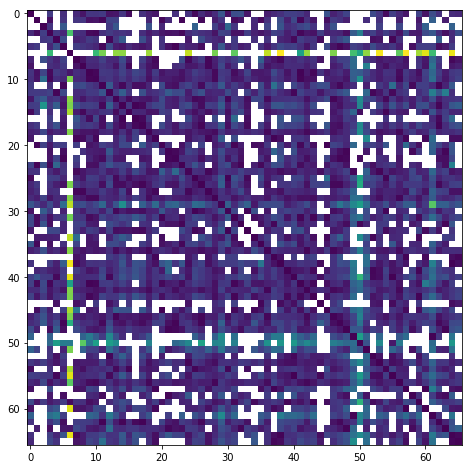

In [7]:
plt.imshow(dtable.as_matrix())

In [8]:
dmatrix = dtable.as_matrix()

In [9]:
dmatrix_nonan = dmatrix

#Obtain mean of columns as you need, nanmean is just convenient.
col_mean = np.nanmean(dmatrix,axis=0)

#Find indicies that you need to replace
inds = np.where(np.isnan(dmatrix))

#Place column means in the indices. Align the arrays using take
dmatrix_nonan[inds]=np.take(col_mean,inds[1])

D = (dmatrix_nonan + dmatrix_nonan.T) / 2

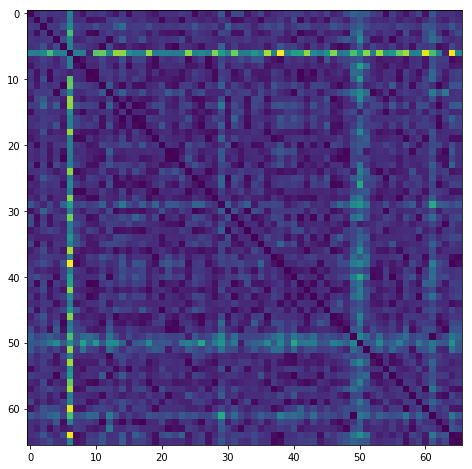

In [10]:
plt.imshow(D)

In [13]:
mds = manifold.MDS(n_components=2, max_iter=30000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(D).embedding_

In [86]:
mds = manifold.MDS(n_components=2, max_iter=30000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos2 = mds.fit(D).embedding_

In [89]:
mds = manifold.MDS(n_components=2, max_iter=30000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos3 = mds.fit(D).embedding_

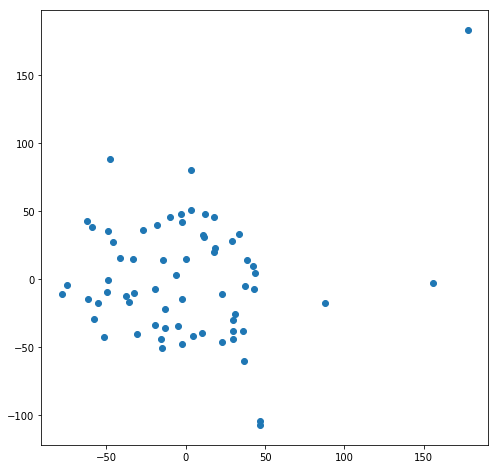

In [14]:
plt.scatter(pos[:,0], pos[:,1])
#plt.scatter(pos2[:,0], pos2[:,1])
#plt.scatter(pos3[:,0], pos3[:,1])

In [15]:
np.sqrt(66.)

8.1240384046359608